<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Internship_official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem1 : Customer Purchase Behavior Analysis and Loyalty Prediction(or Satisfaction Prediction)**

**Objective:-**
**The objective of this project is to develop a predictive model that forecasts customer satisfaction based on various inputs, utilizing data analysis, feature engineering, and machine learning techniques, with the final deliverable being a Flask-based web application for real-time predictions**

# **1. Data Collection**

**1.1 Importing File Formats**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1.2 Loading Dataset**

In [2]:
# Importing CSV file
df=pd.read_csv('/content/Electronic - Electronic.csv')
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


**1.3 Dataset Overview**

In [3]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

# **2. Understanding the Structure**

**2.1 View the First Few Rows**

In [4]:
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


**2.2 Shape of the Data**

In [6]:
df.shape

(5000, 15)

**2.3 View DataFrame Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

**2.4 Summary Statistics**

In [8]:
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


**2.5 View Column Names or Features**

In [9]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

**2.6 Feature Abbreviations**

● **Age:** Age of the customer

● **Items Purchased:** Number of items purchased in a single transaction

● **Total Spent:** Total amount spent on the transaction

● **Discount (%):** Percentage discount on the purchase

● **Satisfaction Score:** Self-reported customer satisfaction score

● **Warranty Extension:** Whether the customer opted for warranty extension

● **Gender:** Gender of the customer

● **Region:** Customer's region

● **Product Category:** Category of the purchased product

● **Payment Method:** Payment method used (e.g., UPI, Cash)

● **Revenue:** Total revenue from the customer

● **Store Rating:** Rating given by the customer to the store

● **Loyalty Score:** Customer's loyalty score

● **Membership Status:** Whether the customer is a member

● **Preferred Visit Time:** Preferred time of visit

# **3. Preprocessing**

# **3.1.1 Data Cleaning:**

## **Handle missing values (impute or remove as appropriate).**

In [10]:
#check for missing values
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


The dataset has missing values in the following columns: Gender (2), Payment Method (4), Store Rating (3), Membership Status (6), and Preferred Visit Time (8).

# **3.1.2 Null value handling**

In [11]:
# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with meadian
df['Membership Status'].fillna(df['Membership Status'].median(), inplace=True)
# 'Store Rating' is symmetric values in column you want to fill with the mean
df['Store Rating'].fillna(df['Store Rating'].mean(), inplace=True)

For categorical values, mode imputation is typically used, as it replaces missing data with the most frequent category, ensuring that the most common value in the dataset is preserved.
I chose median imputation for Membership Status due to its resistance to outliers, and mean imputation for Store Rating to preserve the average, as the data is nearly normal with few missing values.


In [12]:
df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


# **3.2.1 EDA**

# **3.1 Univariate Analysis**

Univariate analysis is a statistical method that examines the distribution, central tendency and spread of a variable within itself. The aim is to describe and summarize the characteristics of a variable.

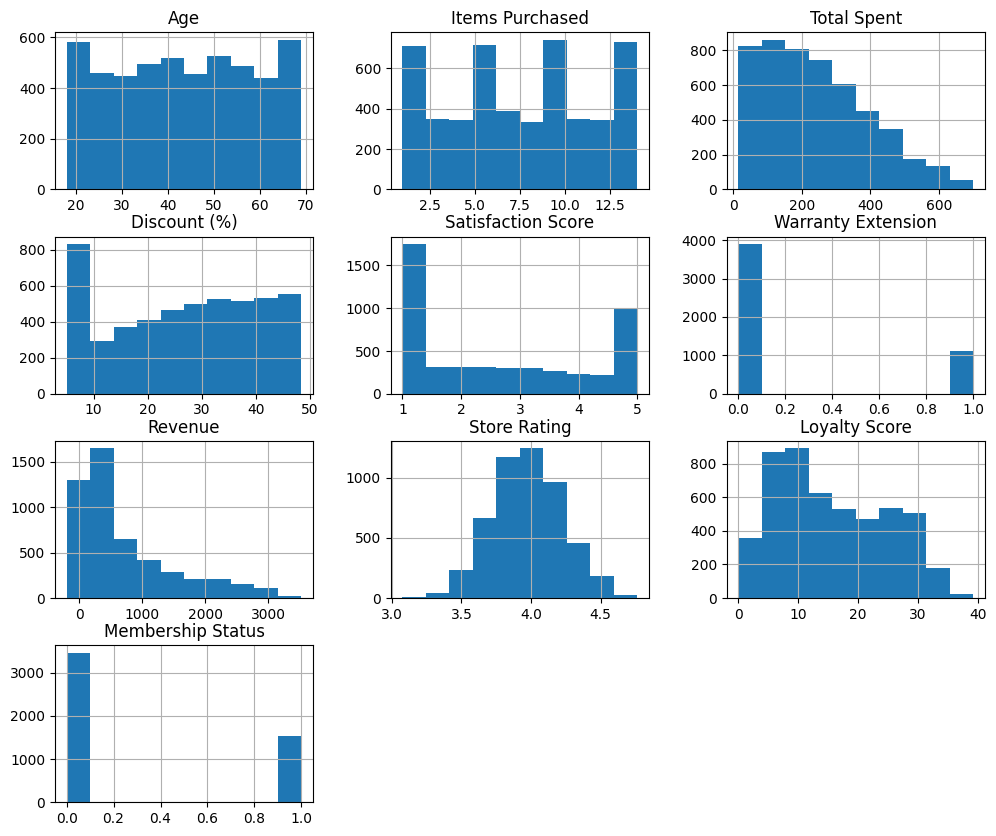

In [13]:
df.hist(figsize=(12, 10))
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Numerical Features')
plt.xticks(rotation=45)  # Improve readability for categorical features
plt.show()

# **Distribution of Satisfaction Score**

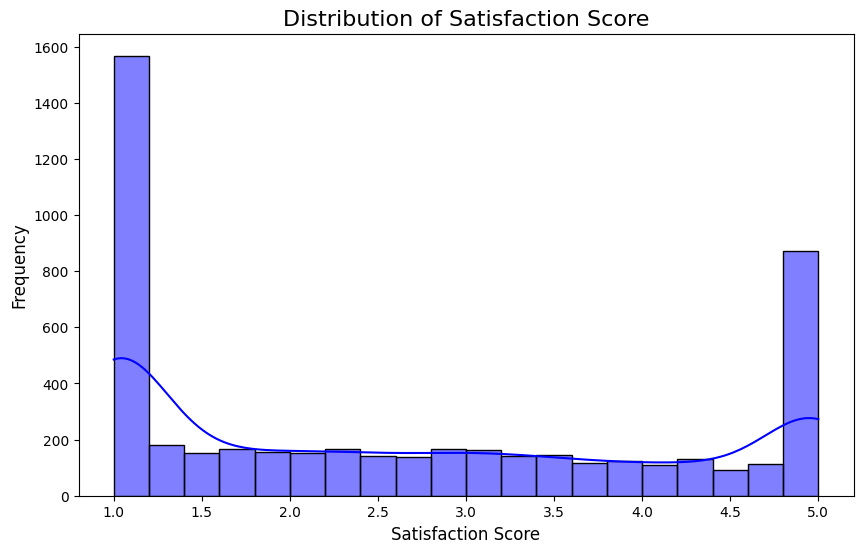

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Satisfaction Score'], bins=20, color='blue', kde=True)
plt.title('Distribution of Satisfaction Score', fontsize=16)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Distribution of Loyalty Score**

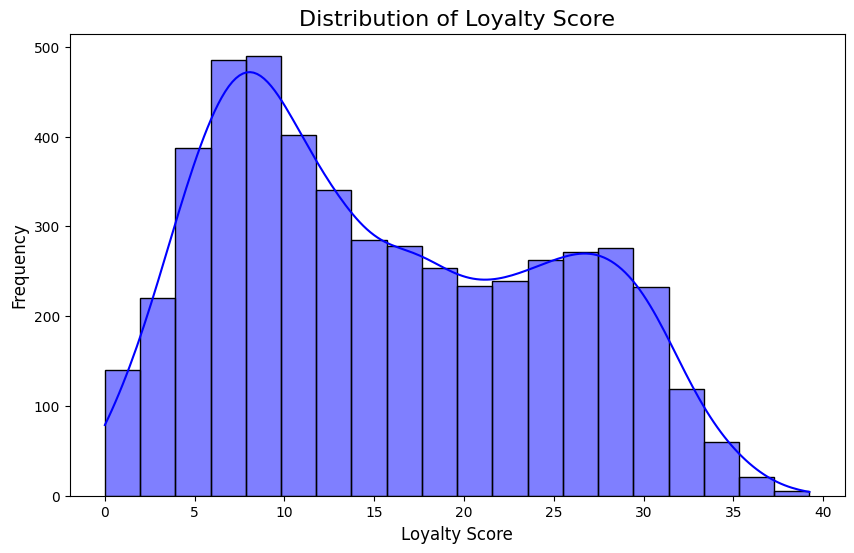

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Loyalty Score'], bins=20, color='blue', kde=True)
plt.title('Distribution of Loyalty Score', fontsize=16)
plt.xlabel('Loyalty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Distribution of Store Rating**

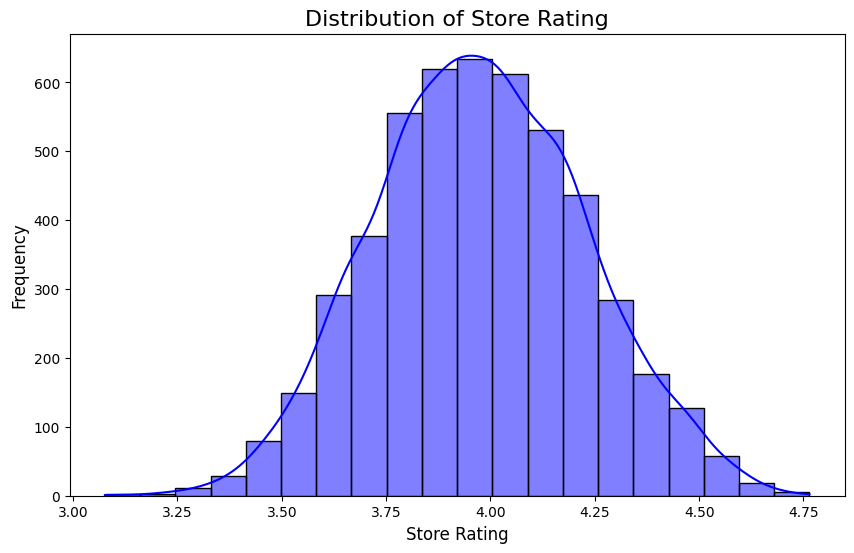

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Store Rating'], bins=20, color='blue', kde=True)
plt.title('Distribution of Store Rating', fontsize=16)
plt.xlabel('Store Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Distribution of Total Spent**

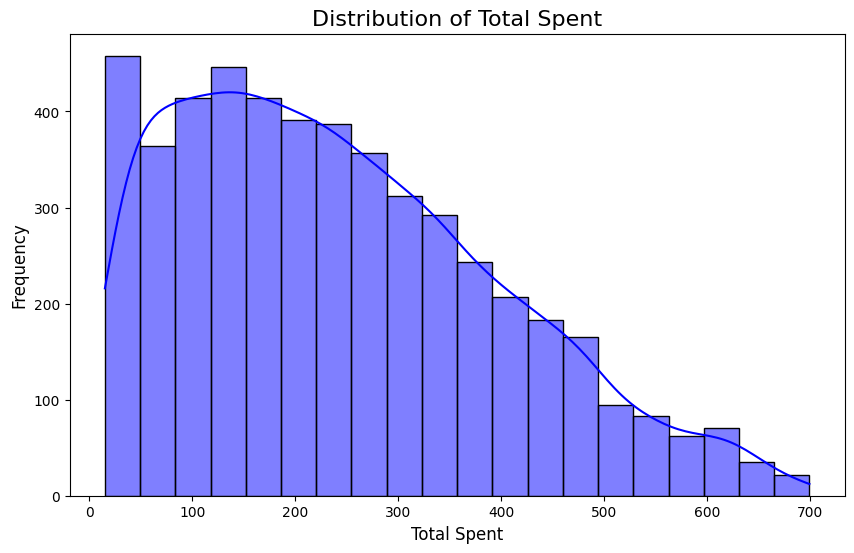

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=20, color='blue', kde=True)
plt.title('Distribution of Total Spent', fontsize=16)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Distribution of Preferred Visit Time**

Summary Statistics for 'Preferred Visit Time':
 count        5000
unique          3
top       Morning
freq         1680
Name: Preferred Visit Time, dtype: object


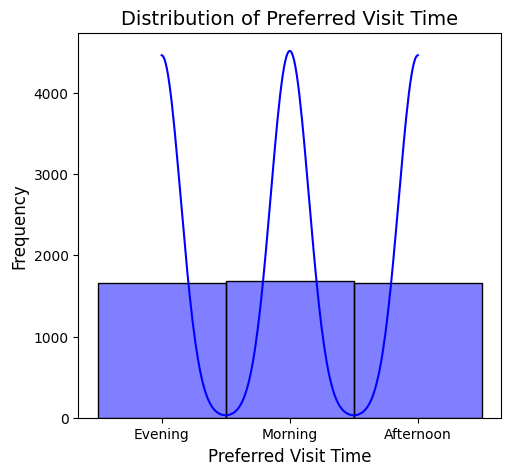

In [18]:
stats = df['Preferred Visit Time'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))
# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Preferred Visit Time'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Preferred Visit Time', fontsize=14)
plt.xlabel('Preferred Visit Time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
print("Summary Statistics for 'Preferred Visit Time':\n",stats)

# **3.2 Bivariate analysis**

# **Total Spent vs. Satisfaction Score:**

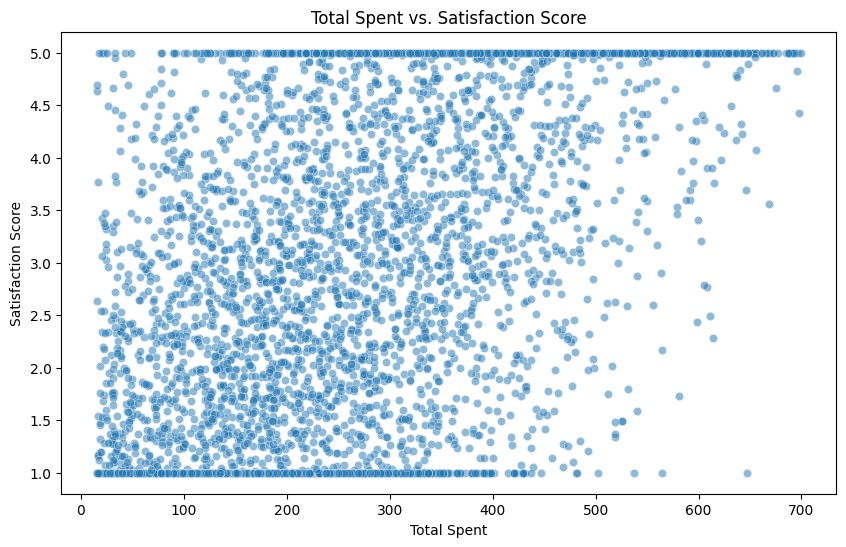

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=df, alpha=0.5)  # Adjust alpha for better visualization if needed
plt.title('Total Spent vs. Satisfaction Score')
plt.xlabel('Total Spent')
plt.ylabel('Satisfaction Score')
plt.show()

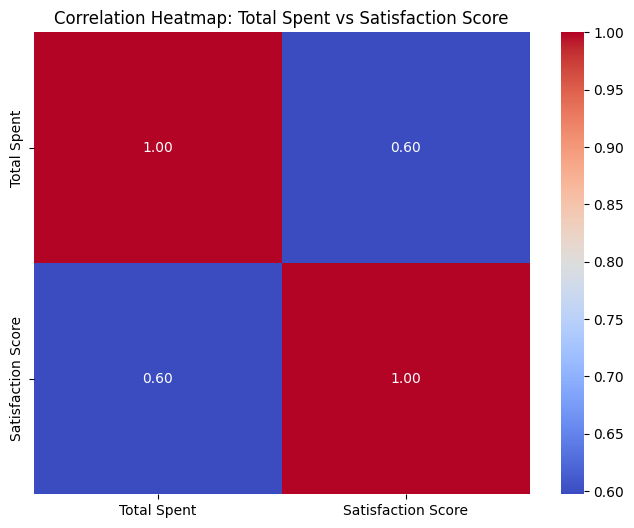

In [20]:
# Correlation Heatmap
correlation_matrix = df[['Total Spent', 'Satisfaction Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Total Spent vs Satisfaction Score')
plt.show()

The analysis suggests that customers who spend more are generally more satisfied, but other factors like product quality, service, and customer loyalty also play a significant role in influencing customer satisfaction.

# **Items Purchased vs. Discount (%):**

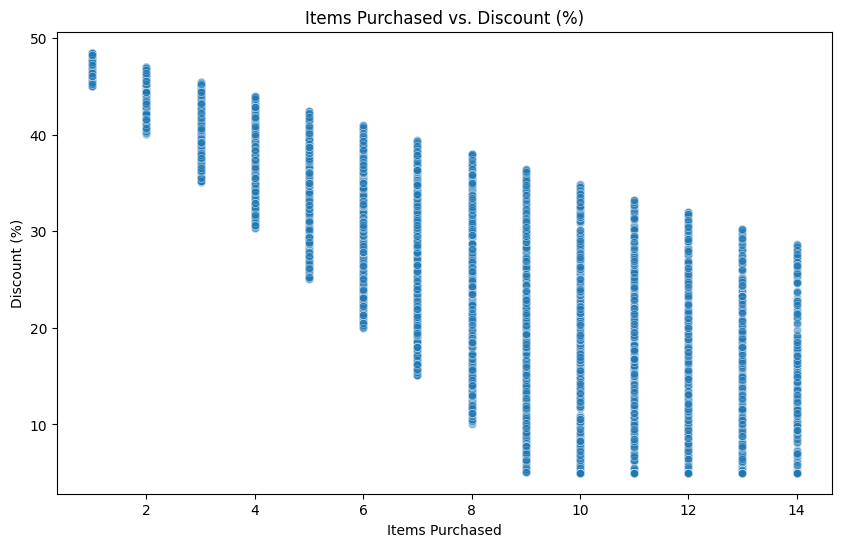

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased', y='Discount (%)', data=df, alpha=0.5)  # Adjust alpha for better visualization if needed
plt.title('Items Purchased vs. Discount (%)')
plt.xlabel('Items Purchased')
plt.ylabel('Discount (%)')
plt.show()

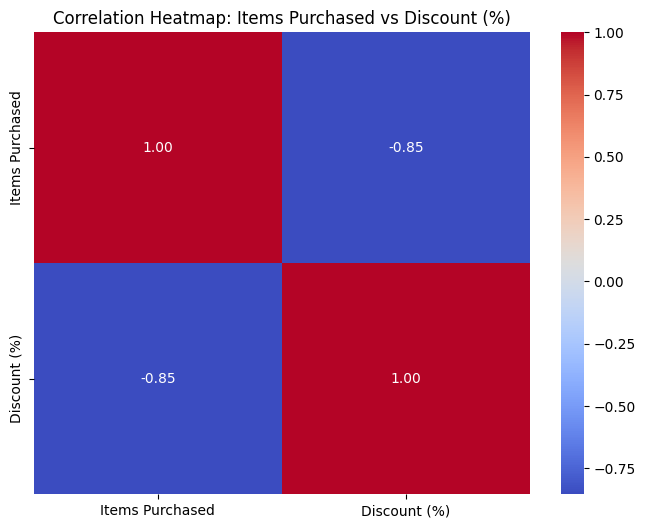

In [22]:
# Correlation Heatmap
correlation_matrix = df[['Items Purchased','Discount (%)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Items Purchased vs Discount (%)')
plt.show()

The analysis suggests that customers who purchase more items typically receive smaller discounts, while those who purchase fewer items receive larger discounts. This pattern could be due to factors like bulk discounts, customer loyalty programs, or targeted promotional strategies.

# **Satisfaction Score and Loyalty Score:**

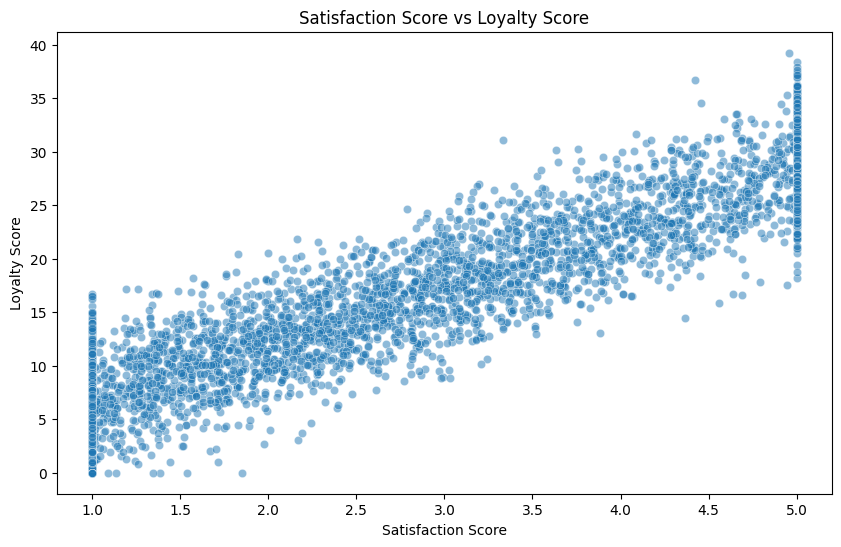

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df, alpha=0.5)  # Adjust alpha for better visualization if needed
plt.title('Satisfaction Score vs Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()

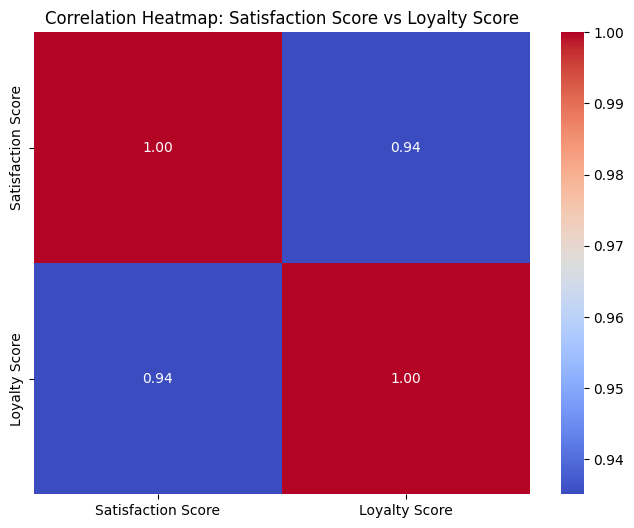

In [24]:
# Correlation Heatmap
correlation_matrix = df[['Satisfaction Score','Loyalty Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Satisfaction Score vs Loyalty Score')
plt.show()

# **Items Purchased Vs Total Spent**

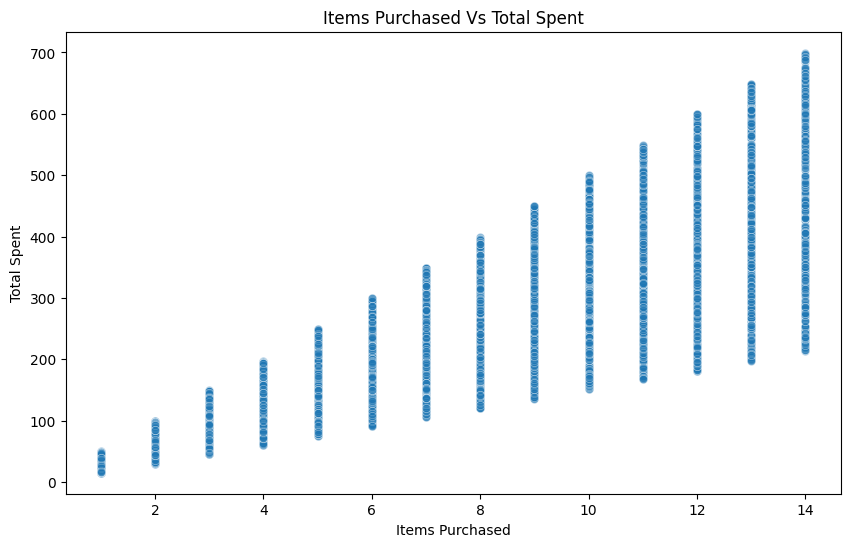

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased',y='Total Spent', data=df, alpha=0.5)  # Adjust alpha for better visualization if needed
plt.title('Items Purchased Vs Total Spent')
plt.xlabel('Items Purchased')
plt.ylabel('Total Spent')
plt.show()

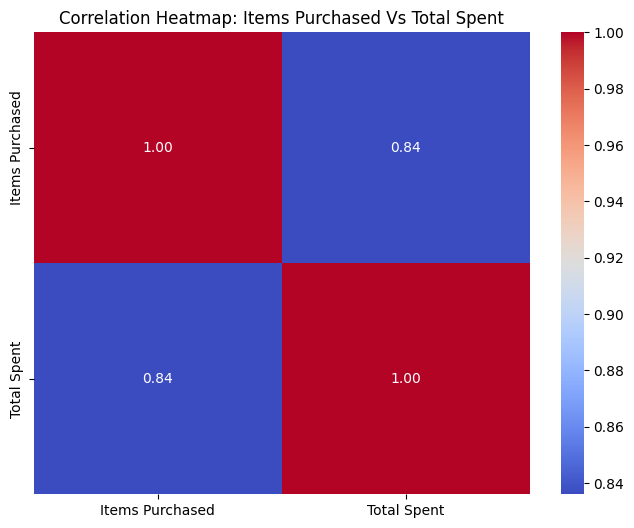

In [26]:
# Correlation Heatmap
correlation_matrix = df[['Items Purchased','Total Spent']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Items Purchased Vs Total Spent')
plt.show()

# **Satisfaction Score vs Gender**

In [27]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Gender')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.7008740217721076
p-value: 0.4962002339248327


Interpretation: Result: Since the p-value is greater than 0.05, you fail to reject the null hypothesis. This implies that there is no statistically significant relationship between the categorical variable and the target variable (satisfaction score) at the 0.05 significance level. Conclusion: The categorical variable you tested likely does not have a meaningful impact on the target variable.

# **Satisfaction Score vs Region**

In [28]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Region')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.5221874069806479
p-value: 0.6670154123763867


# **Satisfaction Score vs Product Category**

In [29]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Product Category')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 0.80273796863724
p-value: 0.523226565585772


# **Satisfaction Score vs Payment Method**

In [30]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Payment Method')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 2.6392270940465705
p-value: 0.03214382438278938


# **Satisfaction Score vs Preferred Visit Time**

In [31]:
import scipy.stats as stats
import pandas as pd

# Assuming 'category_column' is your categorical column and 'target' is the target variable
category_groups = [group['Satisfaction Score'] for name, group in df.groupby('Preferred Visit Time')]
f_value, p_value = stats.f_oneway(*category_groups)

print("ANOVA F-value:", f_value)
print("p-value:", p_value)

ANOVA F-value: 1.0899718171782733
p-value: 0.3363058934730552


In [32]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


# **Multivariate Analysis**

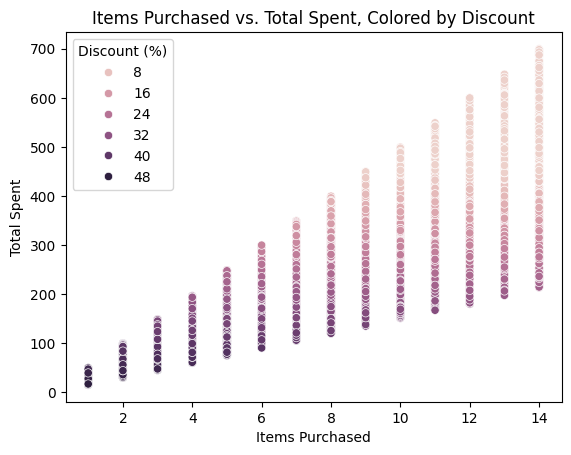

In [33]:
# Color-coded scatter plot
sns.scatterplot(x='Items Purchased', y='Total Spent', hue='Discount (%)', data=df)
plt.title('Items Purchased vs. Total Spent, Colored by Discount')
plt.show()

The graph suggests that while discounts can boost sales, their effectiveness depends on various factors, including product value, promotional strategies, and data limitations. Businesses need to balance discount offers with profitability to maximize their impact.

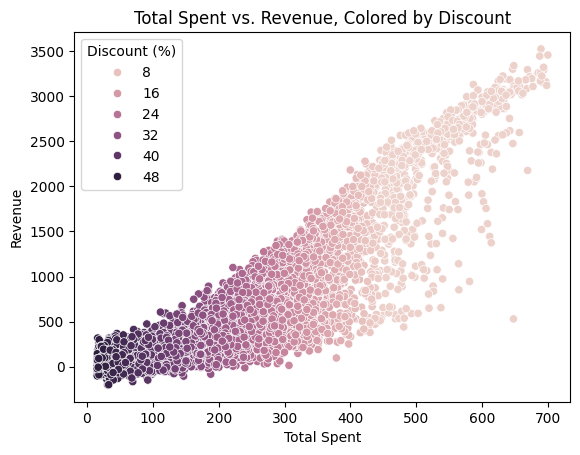

In [34]:
# Color-coded scatter plot
sns.scatterplot(x='Total Spent', y='Revenue', hue='Discount (%)', data=df)
plt.title('Total Spent vs. Revenue, Colored by Discount')
plt.show()

# **4.1.1 Outlier checking**

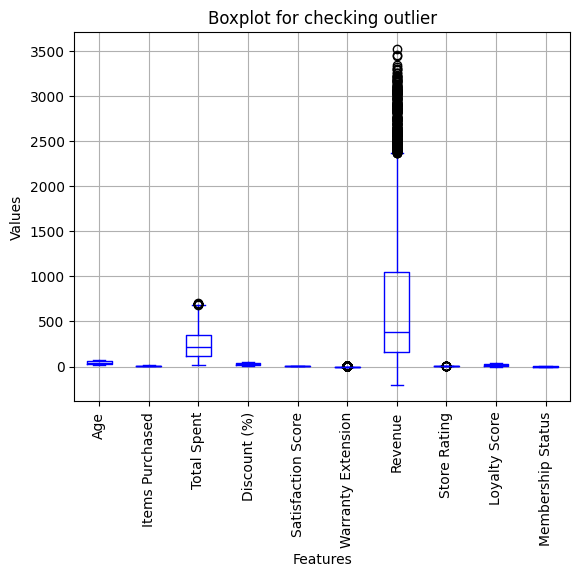

In [35]:
# Outlier checking using boxplot
df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [36]:
# prompt: check outliers of each column with values
#Here Winsorization(capping)-Replaces outliers with a threshold value (percentile-based)
def detect_outliers_iqr(data):
    """
    Detects outliers using the Interquartile Range (IQR) method.

    Args:
        data (pd.Series): A pandas Series representing a column of data.

    Returns:
        tuple: A tuple containing two lists: outliers and outlier indices.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_indices = outliers.index.tolist()
    return outliers, outlier_indices

# Iterate through numerical columns and detect outliers
for col in df.select_dtypes(include=np.number):  # Select only numerical columns
  outliers, outlier_indices = detect_outliers_iqr(df[col])
  if not outliers.empty:  # Check if any outliers were found
    print(f"Outliers detected in column '{col}':")
    print(outliers)
    print(f"Indices of outliers in column '{col}': {outlier_indices}")
  else:
    print(f"No outliers detected in column '{col}'")

No outliers detected in column 'Age'
No outliers detected in column 'Items Purchased'
Outliers detected in column 'Total Spent':
205     693.419051
385     690.202677
432     695.414941
556     690.572975
786     696.487744
796     699.611576
949     689.148310
2131    688.278383
2319    688.249877
2502    697.846059
2930    690.430691
3155    693.135870
4500    687.275300
Name: Total Spent, dtype: float64
Indices of outliers in column 'Total Spent': [205, 385, 432, 556, 786, 796, 949, 2131, 2319, 2502, 2930, 3155, 4500]
No outliers detected in column 'Discount (%)'
No outliers detected in column 'Satisfaction Score'
Outliers detected in column 'Warranty Extension':
0       1
1       1
2       1
7       1
15      1
22      1
24      1
25      1
30      1
37      1
45      1
50      1
51      1
52      1
54      1
55      1
60      1
67      1
68      1
69      1
70      1
74      1
84      1
87      1
89      1
90      1
91      1
92      1
94      1
95      1
99      1
104     1
112  

The outliers in "Revenue" and "Total Spent" appear to be significantly higher than the rest of the data points, potentially indicating genuine high-value customers or potential data anomalies.I chose the Winsorization technique to handle outliers because the extreme values are genuine and represent valid, rare occurrences in the dataset, and I wanted to reduce their impact without losing valuable information.

In [37]:
df_out = df.copy()

# **4.1.2 Outlier Handling : Winsorization**

In [38]:
# prompt: code for winsorization technique for outlier handling for selected columns

def winsorize_outliers(df_out, columns, limits=(0.05, 0.95)):
    """
    Applies winsorization to specified columns of a DataFrame.

    Args:
        df: The input DataFrame.
        columns: A list of column names to winsorize.
        limits: A tuple specifying the lower and upper limits for winsorization (default is 5th and 95th percentiles).

    Returns:
        A new DataFrame with winsorized columns.
    """
    df_out = df_out.copy()
    for col in columns:
        if col in df_out.columns:  # Check if the column exists
            lower_limit = df_out[col].quantile(limits[0])
            upper_limit = df_out[col].quantile(limits[1])
            df_out[col] = np.clip(df_out[col], lower_limit, upper_limit)
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame.")
    return df_out

# Example usage (replace with your desired columns and limits):
columns_to_winsorize = ['Revenue', 'Total Spent', 'Store Rating'] # Example columns
df_out = winsorize_outliers(df_out, columns_to_winsorize)

# Now df_winsorized contains the winsorized data

# **Boxplot after Winsorization**

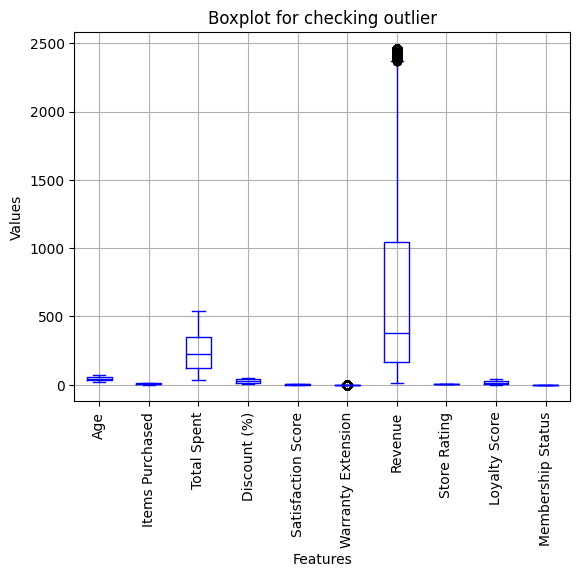

In [39]:
df_out.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# **4.2. Scaling**

## **Robust Scaling**

In [40]:
# prompt: code for robust scaling for selected columns

# Assuming df_delete is your DataFrame and you want to scale 'Total Spent' and 'Revenue'
# Define the columns you want to scale
columns_to_scale = ['Items Purchased','Total Spent', 'Revenue', 'Store Rating', 'Loyalty Score']

# RobustScaler handles outliers better than StandardScaler
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the specified columns
df_out[columns_to_scale] = scaler.fit_transform(df_out[columns_to_scale])

print(df_out.head())

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56        -0.857143    -0.825902     47.077380            1.000000   
1   69         0.428571     0.874848      7.985739            3.760294   
2   46        -0.428571    -0.413011     37.225718            1.771240   
3   32         0.285714     0.864190      8.227732            1.926831   
4   60         0.857143     1.388410      5.000000            3.902927   

   Warranty Extension  Gender Region Product Category Payment Method  \
0                   1    Male  South      Accessories            UPI   
1                   1  Female  South      Accessories           Cash   
2                   1    Male   East           Laptop    Credit Card   
3                   0  Female   East           Tablet            UPI   
4                   0  Female  South           Tablet            UPI   

    Revenue  Store Rating  Loyalty Score  Membership Status  \
0 -0.262024     -0.883745      -0.665904                1.0

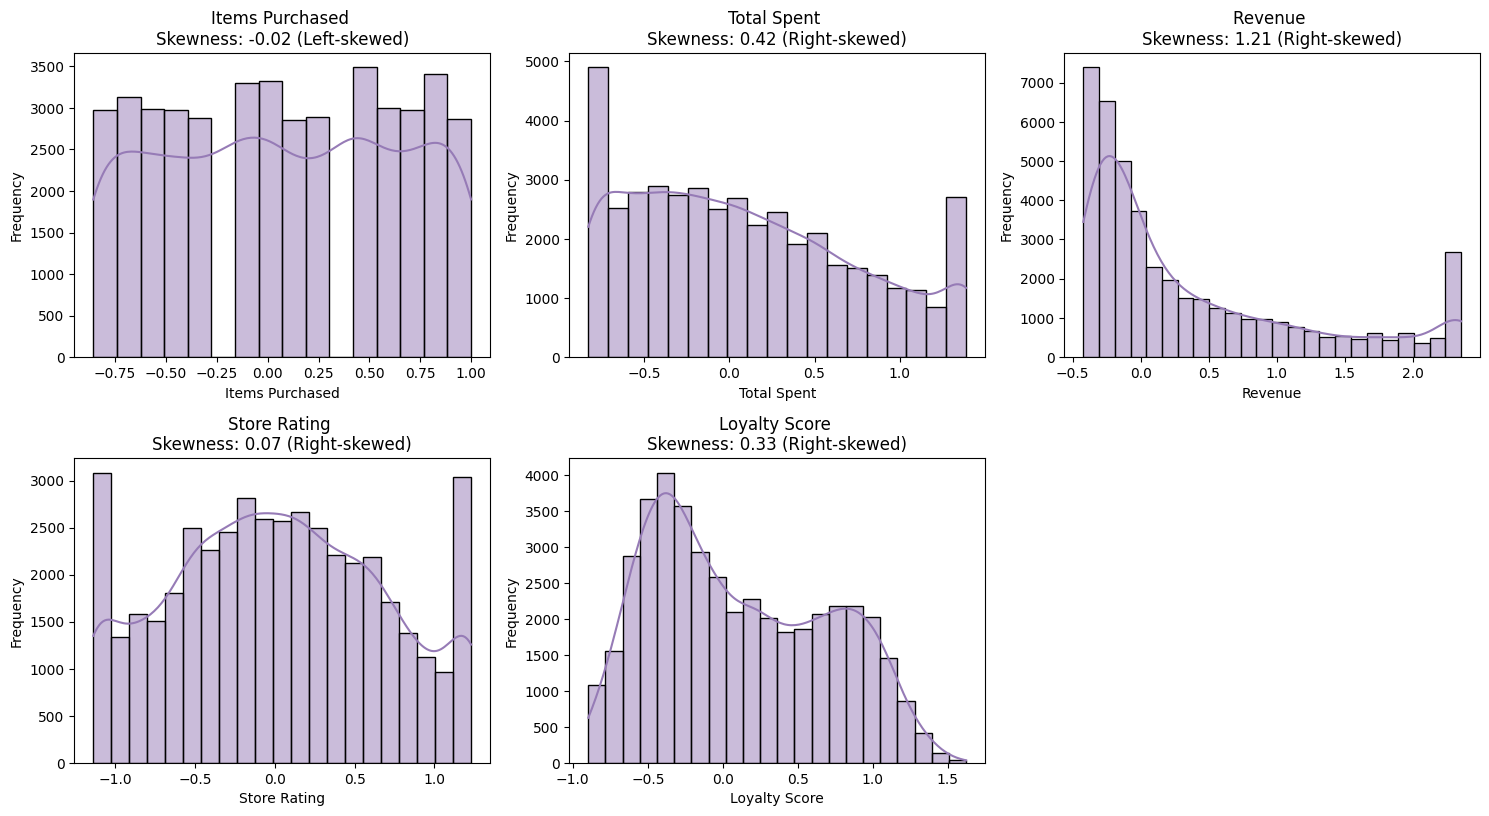

In [41]:
scaled_columns = ['Items Purchased','Total Spent', 'Revenue', 'Store Rating', 'Loyalty Score']

fig = plt.figure(figsize=(15, 20))  # Adjust figure size as needed
plt.subplots_adjust(hspace=0.6)  # Adjust space between subplots

for index, column in enumerate(scaled_columns):
  plt.subplot(5, 3, index + 1)
  sns.histplot(df_out[column], color='#967bb6', stat='frequency', kde=True)
  skewness = df_out[column].skew()
  if skewness > 0:
    skew_type = "Right-skewed"
  elif skewness < 0:
    skew_type = "Left-skewed"
  else:
    skew_type = "Symmetrical"
  plt.title(f"{column} \nSkewness: {skewness:.2f} ({skew_type})", size=12)

fig.tight_layout()
plt.show()

In [42]:
df_out.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')


# **4.4 Feature selection**

                         Age  Items Purchased  Total Spent  Discount (%)  \
Age                 1.000000        -0.005522    -0.002673      0.000439   
Items Purchased    -0.005522         1.000000     0.843571     -0.853837   
Total Spent        -0.002673         0.843571     1.000000     -0.991777   
Discount (%)        0.000439        -0.853837    -0.991777      1.000000   
Satisfaction Score  0.000331         0.494572     0.597405     -0.589436   
Warranty Extension -0.034065         0.064381     0.109813     -0.086038   
Revenue            -0.005575         0.681269     0.873829     -0.843644   
Store Rating       -0.023081         0.016578     0.013765     -0.013490   
Loyalty Score       0.009317         0.557782     0.668860     -0.659179   
Membership Status   0.000485         0.006543    -0.002699      0.004464   

                    Satisfaction Score  Warranty Extension   Revenue  \
Age                           0.000331           -0.034065 -0.005575   
Items Purchased    

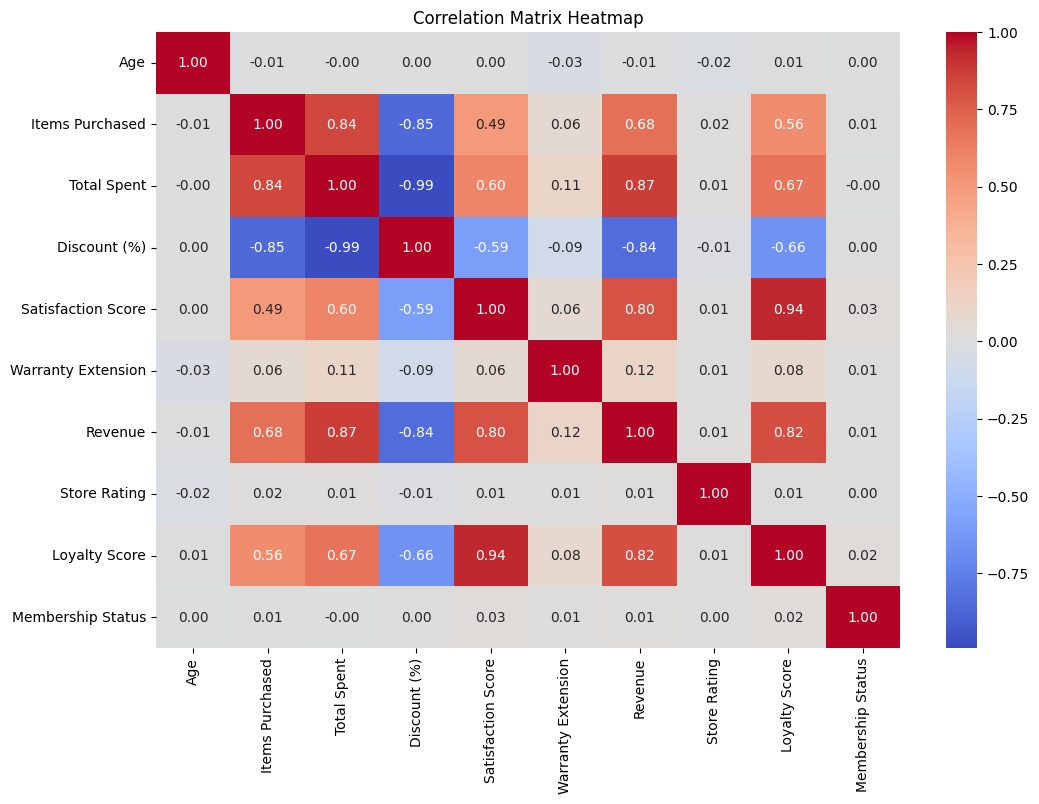

In [43]:
# prompt: correlation in dataframe
df_corr = df_out[['Age', 'Items Purchased', 'Total Spent', 'Discount (%)','Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating','Loyalty Score', 'Membership Status']]

# Calculate the correlation matrix
df_corr = df_corr.corr()
# Display the correlation matrix
print(df_corr)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Columns to Keep:

Items Purchased: Moderately correlated with Satisfaction Score (0.49).

Total Spent: Moderately correlated with Satisfaction Score (0.60) and already captures the impact of discounts.

Loyalty Score: Very high correlation with Satisfaction Score (0.94), highly predictive.

Revenue: Moderately correlated with Satisfaction Score (0.60).

Store Rating: Moderate correlation with Satisfaction Score (0.49).

Columns to Remove:
Age: Very weak correlation with Satisfaction Score (-0.03), not predictive.

Membership Status: Very weak correlation with Satisfaction Score (0.01), not predictive.

Discount (%): Highly correlated with Total Spent (≈ -0.99), making it redundant.

**Based on the ANOVA test results, the columns Gender, Region, Product Category, and Preferred Visit Time do not have a statistically significant relationship with Satisfaction Score and can be removed. The column Payment Method shows a significant relationship and should be kept.**

In [44]:
df_out.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

In [45]:
df_delete1 = df_out.drop(['Age','Membership Status','Discount (%)','Gender','Region','Product Category'], axis=1)

# **4.3 Feature Engineering**

# **4.3.1 Encoding**

**One Hot Encoding**

In [46]:
#encode categorical value
df_delete1=pd.get_dummies(df_delete1,dtype='int')
print(df_out.head())

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56        -0.857143    -0.825902     47.077380            1.000000   
1   69         0.428571     0.874848      7.985739            3.760294   
2   46        -0.428571    -0.413011     37.225718            1.771240   
3   32         0.285714     0.864190      8.227732            1.926831   
4   60         0.857143     1.388410      5.000000            3.902927   

   Warranty Extension  Gender Region Product Category Payment Method  \
0                   1    Male  South      Accessories            UPI   
1                   1  Female  South      Accessories           Cash   
2                   1    Male   East           Laptop    Credit Card   
3                   0  Female   East           Tablet            UPI   
4                   0  Female  South           Tablet            UPI   

    Revenue  Store Rating  Loyalty Score  Membership Status  \
0 -0.262024     -0.883745      -0.665904                1.0

# **Train and Test Split**

In [47]:
X=df_delete1.drop('Satisfaction Score',axis=1)
y1=df_delete1['Satisfaction Score']

**Rfe code for feature selection**

In [48]:
# prompt: rfe code for feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X and y1 are defined as in the previous code
# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features

# Fit the RFE object to your data
rfe.fit(X, y1)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected features:", selected_features)

# You can now use the selected features for your model training.
# For example:
X_selected = X[selected_features]

Selected features: Index(['Items Purchased', 'Total Spent', 'Warranty Extension', 'Revenue',
       'Loyalty Score'],
      dtype='object')


In [49]:
df_delete1.head()

,Items Purchased,Total Spent,Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Net Banking,Payment Method_UPI,Preferred Visit Time_Afternoon,Preferred Visit Time_Evening,Preferred Visit Time_Morning
0,-0.857143,-0.825902,1.000000,1,-0.262024,-0.883745,-0.665904,0,0,0,0,1,0,1,0
1,0.428571,0.874848,3.760294,1,1.251772,-1.135412,0.757222,1,0,0,0,0,0,1,0
2,-0.428571,-0.413011,1.771240,1,-0.334189,-0.134243,-0.446009,0,1,0,0,0,0,0,1
3,0.285714,0.864190,1.926831,0,0.502499,-0.312543,-0.406654,0,0,0,0,1,1,0,0
4,0.857143,1.388410,3.902927,0,2.355855,-0.448521,0.994512,0,0,0,0,1,0,0,1


# **Model Selection**

# **Random Forest Model**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import pandas as pd

# Assuming X_selected and y are defined from your feature selection step

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size=0.2, random_state=42,)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()  # You can adjust the number of estimators

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.15838369062304253
R-squared: 0.9345538480866591
Root Mean Squared Error: 0.39797448488947446


# **Other models**

# **K-NN model**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import pandas as pd

# Assuming X_selected and y are defined from your feature selection step

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size=0.2, random_state=42)

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.16862506811826683
R-squared: 0.9303219808740838
Root Mean Squared Error: 0.4106398277301738


# **XGBoost**

In [52]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.17032317428361585
R-squared: 0.9296203018462417


**Based on the evaluation metrics, the Random Forest model was selected as the final model due to its lowest Mean Squared Error (0.1573) and Root Mean Squared Error (0.3966), along with the highest R-squared value (0.9350), indicating better accuracy and performance compared to the other models.**